In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\avocado.csv", index_col=0)

In [28]:
df.head(3)
# df.tail(2)
# # list(df.region.unique())

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [30]:
type(df["AveragePrice"])   # series
type(df[['AveragePrice']])  # DataFrame

pandas.core.frame.DataFrame

In [37]:
albany_df = df[df["region"] == 'Albany']
# selet only prices in Albany
albany_df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [38]:
# index = unique identifier
print(albany_df.shape)
albany_df.index

(338, 13)


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', length=338)

In [39]:
albany_df.set_index('Date', inplace=True)  # without this option, we don't actually modify the Dataset

In [40]:
# now you see: we haven't actually modified the dataset. 
# for this, we need the inplace option!
albany_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


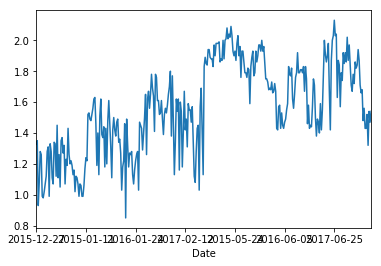

In [11]:
albany_df["AveragePrice"].plot()
# labels fucked up: pandas doesn't know it's a Datetime type i guess.

[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07] ...


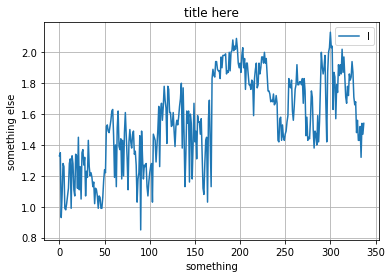

In [51]:
import numpy as np
import matplotlib.pyplot as plt
array = np.array(albany_df["AveragePrice"])
print(array[:10], '...')
plt.plot(array)
plt.xlabel('something')
plt.ylabel('something else')
plt.title("title here")
plt.legend('legendary')
plt.grid()

In [53]:
print(type(albany_df.index))
# we better convert the index to datetime data type
albany_df.index = pd.to_datetime(albany_df.index)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

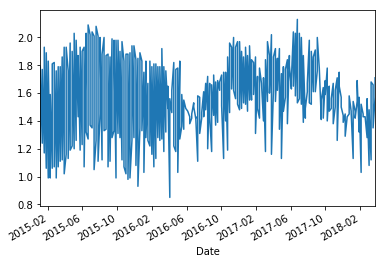

In [54]:
albany_df["AveragePrice"].plot()
# you can see that it changed the data type to datetime64
albany_df.index

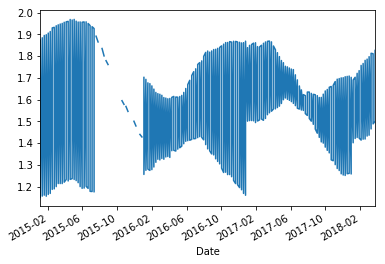

In [55]:
# smooth the curve plotting average of 25 points instead of the point itself
albany_df['AveragePrice'].rolling(25).mean().plot()

C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


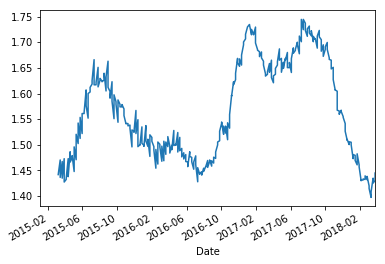

In [56]:
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(20).mean().plot()

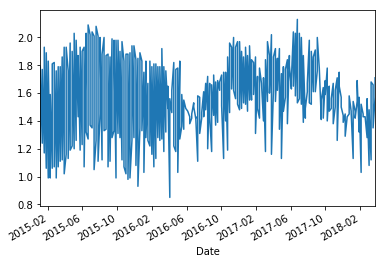

In [57]:
albany_df["AveragePrice"].plot() # the original plot still has too much noise if we dont smooth it 

In [58]:
albany_df['Price25avg'] = albany_df["AveragePrice"].rolling(25).mean()

C:\Users\Mfornaroli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
albany_df.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25avg
Date,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [20]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25avg
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [60]:
albany_df.dropna().head(3)
# like this we are NOT modifying our dataframe

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25avg
Date,,,,,,,,,,,,,
2015-03-29,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328


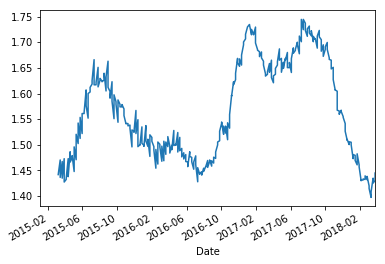

In [62]:
# what we could do instead, to avoid the warning is: let know pandas that we know it's a copy, using the copy function. 
albany_df = df.copy()[df["region"]=='Albany']
albany_df.set_index('Date', inplace=True)
albany_df.index = pd.to_datetime(albany_df.index)
albany_df.index
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(20).mean().plot()
albany_df['Price25avg'] = albany_df["AveragePrice"].rolling(25).mean()
# and now, since we know that it's a copy, we dont have the warning anymore. so better do it... explicitly with copy() !!!

In [71]:
print(len(list(df["region"].unique())), '<-- elementi nella lista delle regioni')
print(list(df["region"].unique())[:10], 'etc etc...')

54 <-- elementi nella lista delle regioni
['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton'] etc etc...


In [72]:
# let's create another dataframe containing the avg-25 prices of each region
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\avocado.csv")
df = df.copy()[df["type"]=='organic']   # selezioniamo solo quelli di tipo organico

graph_df = pd.DataFrame()  # empty dataframe

for region in df["region"].unique():
    print(' slecting data of region --> ',region)
    
    region_df = df.copy()[df["region"]==region]
    region_df.set_index('Date', inplace=True)
    region_df.index = pd.to_datetime(region_df.index)
    region_df.sort_index(inplace=True)
    # add line containing rolling average
    region_df[f'{region}_Price25avg'] = region_df["AveragePrice"].rolling(25).mean()
    
    # add it to the new dataframe. we can't use join when the df is empty! careful
    if graph_df.empty:
        graph_df = region_df[[f'{region}_Price25avg']]  # note: 2 parenthesis -> dataframe, one -> pd.series
    else:
        graph_df = graph_df.join(region_df[f'{region}_Price25avg'])
    
graph_df.tail()

 slecting data of region -->  Albany
 slecting data of region -->  Atlanta
 slecting data of region -->  BaltimoreWashington
 slecting data of region -->  Boise
 slecting data of region -->  Boston
 slecting data of region -->  BuffaloRochester
 slecting data of region -->  California
 slecting data of region -->  Charlotte
 slecting data of region -->  Chicago
 slecting data of region -->  CincinnatiDayton
 slecting data of region -->  Columbus
 slecting data of region -->  DallasFtWorth
 slecting data of region -->  Denver
 slecting data of region -->  Detroit
 slecting data of region -->  GrandRapids
 slecting data of region -->  GreatLakes
 slecting data of region -->  HarrisburgScranton
 slecting data of region -->  HartfordSpringfield
 slecting data of region -->  Houston
 slecting data of region -->  Indianapolis
 slecting data of region -->  Jacksonville
 slecting data of region -->  LasVegas
 slecting data of region -->  LosAngeles
 slecting data of region -->  Louisville
 sle

,Albany_Price25avg,Atlanta_Price25avg,BaltimoreWashington_Price25avg,Boise_Price25avg,Boston_Price25avg,BuffaloRochester_Price25avg,California_Price25avg,Charlotte_Price25avg,Chicago_Price25avg,CincinnatiDayton_Price25avg,...,SouthCarolina_Price25avg,SouthCentral_Price25avg,Southeast_Price25avg,Spokane_Price25avg,StLouis_Price25avg,Syracuse_Price25avg,Tampa_Price25avg,TotalUS_Price25avg,West_Price25avg,WestTexNewMexico_Price25avg
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,...,1.6184,1.5728,1.7116,2.1544,1.9240,1.3156,1.7204,1.7144,1.8620,1.8708
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,...,1.5952,1.5592,1.6868,2.1040,1.8868,1.3004,1.7104,1.6940,1.8220,1.8372
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,...,1.5612,1.5400,1.6484,2.0552,1.8468,1.2932,1.6916,1.6748,1.7912,1.8052
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,...,1.5312,1.5204,1.6156,2.0012,1.8192,1.2848,1.6776,1.6588,1.7644,1.7772
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,...,1.5004,1.5072,1.5820,1.9496,1.7976,1.2700,1.6484,1.6428,1.7304,1.7472


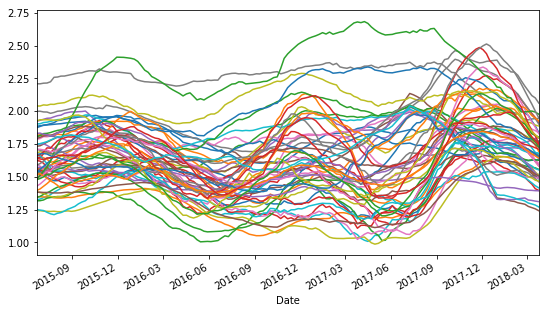

In [25]:
graph_df.dropna().plot(figsize=(9,5), legend=False)

# another Dataset, on minimum wage

In [82]:
# Minimum Wage Data.csv
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\Minimum Wage Data.csv", encoding='latin')  #change the encoding
df.to_csv(r"C:\Users\mfornaroli\Desktop\datasets\MinimumWageData.csv", encoding='utf-8')  # save again, different encoding
df = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\MinimumWageData.csv")  # re read our df
df.head(3)
# Low2018 is the column we are interested in. actual values, normalized and everything... 

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00,0.000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10,2.100,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.468,34.783333,4.75,3.37


In [83]:
type(df.groupby("State"))   # it's an object of its kind.... 

pandas.core.groupby.generic.DataFrameGroupBy

In [84]:
# groupby object, has some interesting properties. . . 
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [87]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
#     print('shape of the df we want to use', group.shape)
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={'Low.2018': name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={'Low.2018': name}))

act_min_wage.head(5)

shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)
shape of the df we want to use (50, 10)


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [30]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [89]:
for column in act_min_wage.columns:
    if act_min_wage[column].isna().sum() != 0:
        print("for state {}".format(column), "we have --> ", act_min_wage[column].isna().sum() , "   Nan values")
print("\n")        
for column in act_min_wage.columns:
    if act_min_wage[column].mean() == 0:
        print("for state {}".format(column), "we have --> ", act_min_wage[column].mean() , "  average     (no data)")

for state U.S. Virgin Islands we have -->  11    Nan values


for state Alabama we have -->  0.0   average     (no data)
for state Louisiana we have -->  0.0   average     (no data)
for state Mississippi we have -->  0.0   average     (no data)
for state South Carolina we have -->  0.0   average     (no data)
for state Tennessee we have -->  0.0   average     (no data)


In [32]:
import numpy as np
# get rid of all data with value zero (or NaN)
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [33]:
issue_df = df[df["Low.2018"]==0]
print("these states have some missing value (or just.. no min wage at all) --> ",list(issue_df.State.unique()))
issue_df.head(3)

these states have some missing value (or just.. no min wage at all) -->  ['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona']


,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0


# visualizing the correlation table

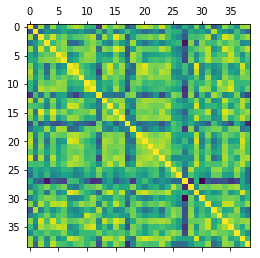

In [34]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)

['Al', 'Ar', 'Ca', 'Co', 'Co', 'De', 'Di', 'Fe', 'Gu', 'Ha', 'Id', 'In', 'Ke', 'Ma', 'Ma', 'Ma', 'Mi', 'Mi', 'Ne', 'Ne', 'Ne', 'Ne', 'Ne', 'Ne', 'No', 'No', 'Oh', 'Ok', 'Or', 'Pe', 'Pu', 'Rh', 'So', 'Ut', 'Ve', 'Wa', 'We', 'Wi', 'Wy']


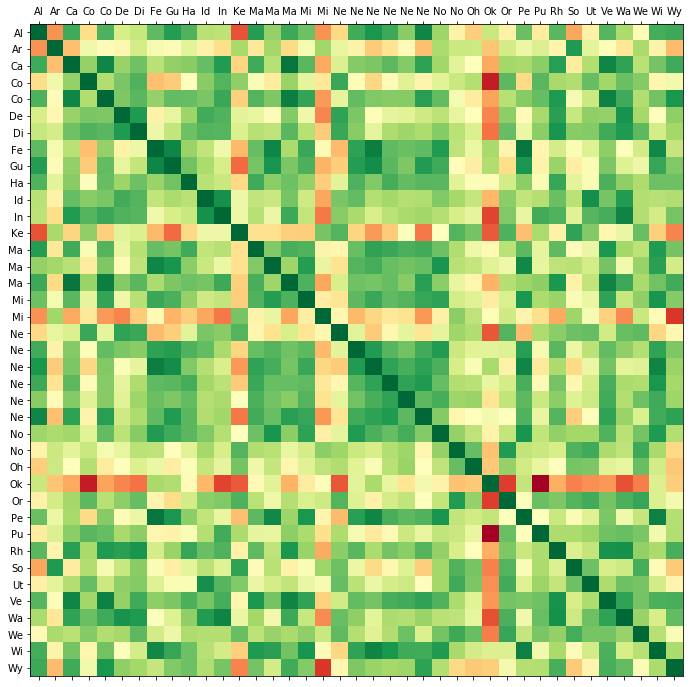

In [35]:
# correlation table

labels = [c[:2] for c in min_wage_corr.columns]
print(labels)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111) 
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()

# merging datasets (vote for trump + unemployemet)

In [118]:
import pandas as pd
import numpy as np
election_result = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\pres16results.csv")
unemp_rate = pd.read_csv(r"C:\Users\mfornaroli\Desktop\datasets\unEmpRate.csv")

In [108]:
election_result.head(3)

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump


In [63]:
unemp_rate.head(3)

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9


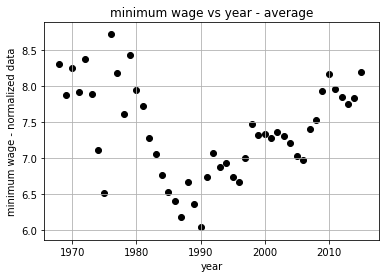

In [147]:
act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis=1)
act_min_wage.shape
act_min_wage.head(2)
# act_min_wage.plot(legend=False, figsize=(10,6))
avg_min_wage_USA = []
for year in range(1968, 1968+48):
#     print(year)
    plt.scatter(year, act_min_wage.loc[year, :].mean(), color = 'black')
    avg_min_wage_USA.append(act_min_wage.loc[year, :].mean())
    year += 1
plt.grid()
plt.xlabel('year')
plt.ylabel('minimum wage - normalized data')
plt.title('minimum wage vs year - average')
# plt.legend('value')
plt.show()

10.94


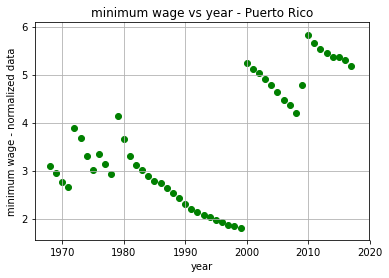

In [126]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN
    
print(get_min_wage(1980, "Alaska"))

import matplotlib.pyplot as plt
year = 1968
for i in range(50):
    state = "Puerto Rico"
    plt.scatter(year, get_min_wage(year, state), color = 'g')
#     print(year, get_min_wage(year, state) )
    year += 1
plt.grid()
plt.xlabel('year')
plt.ylabel('minimum wage - normalized data')
plt.title('minimum wage vs year - ' + state)
# plt.legend('value')
plt.show()

In [67]:
# now we want to map this function to a new column dude. 
print("running...")
%time unemp_rate['min_wage'] =list(map(get_min_wage, unemp_rate['Year'], unemp_rate['State']))
print("done")
unemp_rate.head()

running...
Wall time: 3min 39s
done


,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [68]:
unemp_rate[["Rate", "min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.153047
min_wage,0.153047,1.000000


In [69]:
unemp_rate[["Rate", "min_wage"]].cov()

,Rate,min_wage
Rate,9.687873,0.651586
min_wage,0.651586,1.874228


In [70]:
len(unemp_rate)

885548

In [119]:
unemp_rate_2015 = unemp_rate.copy()[(unemp_rate['Year']==2015) & (unemp_rate['Month']=='February')]

In [120]:
print(len(unemp_rate_2015))  # ok so now is much smaller
unemp_rate_2015.tail(3)
# unemp_rate_2015.State.unique()

2802


,Year,Month,State,County,Rate
2799,2015,February,Maine,Knox County,6.1
2800,2015,February,Maine,Piscataquis County,7.0
2801,2015,February,Maine,Aroostook County,7.2


In [121]:
# dictionary of abbreviations of US states

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}



In [122]:
unemp_rate_2015["State"] = unemp_rate_2015["State"].map(us_state_abbrev)
unemp_rate_2015.State.unique()

array(['MS', 'OK', 'DE', 'MN', 'IL', 'AR', 'NM', 'IN', 'MD', 'LA', 'ID',
       'WY', 'TN', 'AZ', 'IA', 'KS', 'UT', 'VA', 'OR', 'CT', 'MT', 'CA',
       'MA', 'WV', 'SC', 'NH', 'WI', 'VT', 'ND', 'PA', 'KY', 'HI', 'NE',
       'MO', 'OH', 'AL', 'RI', 'SD', 'CO', 'NJ', 'WA', 'NC', 'NY', 'TX',
       'NV', 'ME'], dtype=object)

In [138]:
unemp_rate_2015.head()
# ok! it workssss this map function is really amazing bro :)
# we are going to perform a merge based on state and county. we need to make sure they are identical


,,Year,Month,Rate
County,State,,,
Newton County,MS,2015,February,6.1
Panola County,MS,2015,February,9.4
Monroe County,MS,2015,February,7.9
Hinds County,MS,2015,February,6.1
Kemper County,MS,2015,February,10.6


In [126]:
election_result.rename(columns={"county":'County', "st": 'State'}, inplace=True)
# we want them to have the same names
election_result.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [129]:
# let's set a double index for both: County and State
# mannaggia a sto cavolo di inplace=True !!!
for df in [unemp_rate_2015, election_result]:
    df.set_index(["County", "State"], inplace=True)
print(unemp_rate_2015.head())
print(unemp_rate_2015.head())

                     Year     Month  Rate
County        State                      
Newton County MS     2015  February   6.1
Panola County MS     2015  February   9.4
Monroe County MS     2015  February   7.9
Hinds County  MS     2015  February   6.1
Kemper County MS     2015  February  10.6
                     Year     Month  Rate
County        State                      
Newton County MS     2015  February   6.1
Panola County MS     2015  February   9.4
Monroe County MS     2015  February   7.9
Hinds County  MS     2015  February   6.1
Kemper County MS     2015  February  10.6


In [130]:
election_result = election_result[election_result['cand'] == "Donald Trump"]
election_result = election_result[["pct"]]  # we care only about the percentage

In [131]:
election_result.dropna(inplace=True)

In [137]:
election_result.head()

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830
       NY     0.374752

In [146]:
all_together = unemp_rate_2015.merge(election_result, on = ["County", "State"])
all_together.dropna(inplace=True)
all_together.head(40)

,,Year,Month,Rate,pct
County,State,,,,
Newton County,MS,2015,February,6.1,0.689900
Panola County,MS,2015,February,9.4,0.496230
Monroe County,MS,2015,February,7.9,0.640454
Hinds County,MS,2015,February,6.1,0.272232
Kemper County,MS,2015,February,10.6,0.383272
Calhoun County,MS,2015,February,6.9,0.687806
Clarke County,MS,2015,February,7.9,0.659665
Jefferson County,MS,2015,February,14.3,0.126717
Madison County,MS,2015,February,4.5,0.568438


In [140]:
all_together.drop("Year", axis=1, inplace=True)

In [142]:
all_together.drop("Month", axis=1, inplace=True)
all_together.head()
# so now we have it, hurray! dataset with unemployement rate and votes for donald trump lol


,,Rate,pct
County,State,,
Newton County,MS,6.1,0.689900
Panola County,MS,9.4,0.496230
Monroe County,MS,7.9,0.640454
Hinds County,MS,6.1,0.272232
Kemper County,MS,10.6,0.383272


In [143]:
all_together.corr()

,Rate,pct
Rate,1.000000,-0.195986
pct,-0.195986,1.000000


In [144]:
all_together.cov()

,Rate,pct
Rate,5.362972,-0.070181
pct,-0.070181,0.023910
